<a href="https://colab.research.google.com/github/NattachaiJairak/DADS6003/blob/main/stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install ta-lib


--2024-02-18 14:45:36--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-18 14:45:36--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-18 14:45:37--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
Tesla = yf.Ticker('TSLA')
interval = '1h'
start = '2023-9-1'
end = '2023-9-30'
df = Tesla.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-01 09:30:00-04:00,257.260010,259.079407,251.050095,252.570007,35063467,0.0,0.0
2023-09-01 10:30:00-04:00,252.550003,252.551102,246.970001,248.056396,23937651,0.0,0.0
2023-09-01 11:30:00-04:00,248.089996,248.514999,245.460007,246.770004,16126759,0.0,0.0
2023-09-01 12:30:00-04:00,246.763702,247.990005,246.360001,246.623795,11353569,0.0,0.0
2023-09-01 13:30:00-04:00,246.620697,247.070007,242.509995,242.910004,16014620,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-29 11:30:00-04:00,251.309998,252.490005,250.720001,251.979996,14690602,0.0,0.0
2023-09-29 12:30:00-04:00,252.000000,252.630005,248.000000,249.235001,14767181,0.0,0.0
2023-09-29 13:30:00-04:00,249.210007,249.479996,246.350006,248.119995,14585894,0.0,0.0


In [ ]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [ ]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr
Datetime,,,,,,,,,
2023-09-06 13:30:00-04:00,250.570007,251.989899,250.149994,251.474899,12365670,0.0,0.0,252.619778,-0.671967
2023-09-06 14:30:00-04:00,251.500000,252.440002,250.960007,251.658905,11030109,0.0,0.0,252.234229,-0.673603
2023-09-06 15:30:00-04:00,251.649994,252.240005,251.231598,251.990005,6494587,0.0,0.0,251.897229,-0.722941
2023-09-07 09:30:00-04:00,245.070007,248.699997,243.264999,245.119995,35968504,0.0,0.0,250.677069,-0.139496
2023-09-07 10:30:00-04:00,245.145004,246.940002,243.509995,246.330002,17282707,0.0,0.0,249.582570,0.401066
...,...,...,...,...,...,...,...,...,...
2023-09-29 11:30:00-04:00,251.309998,252.490005,250.720001,251.979996,14690602,0.0,0.0,247.205139,0.843656
2023-09-29 12:30:00-04:00,252.000000,252.630005,248.000000,249.235001,14767181,0.0,0.0,248.166640,0.797746
2023-09-29 13:30:00-04:00,249.210007,249.479996,246.350006,248.119995,14585894,0.0,0.0,248.570639,0.626280


In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [ ]:
y

array([ 1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
        1,  1, -1])

In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)


In [ ]:
model

LogisticRegression()

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[6.162162195204168e-14]
1,High,[6.348253951287192e-14]
2,Low,[6.426633992060724e-14]
3,Close,[6.58509136224807e-14]
4,Volume,[1.1468557346756941e-08]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_10,[6.108978885969393e-14]
8,Corr,[-2.0470160065458733e-15]


In [ ]:
probability = model.predict_proba(X_test)
probability

array([[0.4541143 , 0.5458857 ],
       [0.46959017, 0.53040983],
       [0.39476904, 0.60523096],
       [0.4518363 , 0.5481637 ],
       [0.46257103, 0.53742897],
       [0.47067958, 0.52932042],
       [0.47558841, 0.52441159],
       [0.47195993, 0.52804007],
       [0.48085758, 0.51914242],
       [0.4104589 , 0.5895411 ],
       [0.44600618, 0.55399382],
       [0.46695918, 0.53304082],
       [0.47163278, 0.52836722],
       [0.46628524, 0.53371476],
       [0.47215642, 0.52784358],
       [0.48207954, 0.51792046],
       [0.40813745, 0.59186255],
       [0.44704635, 0.55295365],
       [0.45487903, 0.54512097],
       [0.44273299, 0.55726701],
       [0.45271555, 0.54728445],
       [0.43971991, 0.56028009],
       [0.4728826 , 0.5271174 ],
       [0.41230161, 0.58769839],
       [0.44778604, 0.55221396],
       [0.44316248, 0.55683752],
       [0.46146866, 0.53853134],
       [0.46950144, 0.53049856],
       [0.46655544, 0.53344456],
       [0.471888  , 0.528112  ],
       [0.

In [ ]:
predicted = model.predict(X_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Predict probabilities and labels for the test set
probability = model.predict_proba(X_test)
predicted_labels = model.predict(X_test)

# Find the dates for the test set
test_dates = df.index[split:]

# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates = test_dates[predicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)



Date(s) with Buy Signal(s):
DatetimeIndex(['2023-09-22 14:30:00-04:00', '2023-09-22 15:30:00-04:00',
               '2023-09-25 09:30:00-04:00', '2023-09-25 10:30:00-04:00',
               '2023-09-25 11:30:00-04:00', '2023-09-25 12:30:00-04:00',
               '2023-09-25 13:30:00-04:00', '2023-09-25 14:30:00-04:00',
               '2023-09-25 15:30:00-04:00', '2023-09-26 09:30:00-04:00',
               '2023-09-26 10:30:00-04:00', '2023-09-26 11:30:00-04:00',
               '2023-09-26 12:30:00-04:00', '2023-09-26 13:30:00-04:00',
               '2023-09-26 14:30:00-04:00', '2023-09-26 15:30:00-04:00',
               '2023-09-27 09:30:00-04:00', '2023-09-27 10:30:00-04:00',
               '2023-09-27 11:30:00-04:00', '2023-09-27 12:30:00-04:00',
               '2023-09-27 13:30:00-04:00', '2023-09-27 14:30:00-04:00',
               '2023-09-27 15:30:00-04:00', '2023-09-28 09:30:00-04:00',
               '2023-09-28 10:30:00-04:00', '2023-09-28 11:30:00-04:00',
               '2023-0

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 0 18]
 [ 0 19]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        18
           1       0.51      1.00      0.68        19

    accuracy                           0.51        37
   macro avg       0.26      0.50      0.34        37
weighted avg       0.26      0.51      0.35        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-179-7884410fba6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-179-7884410fba6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSLA_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-179-7884410fba6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

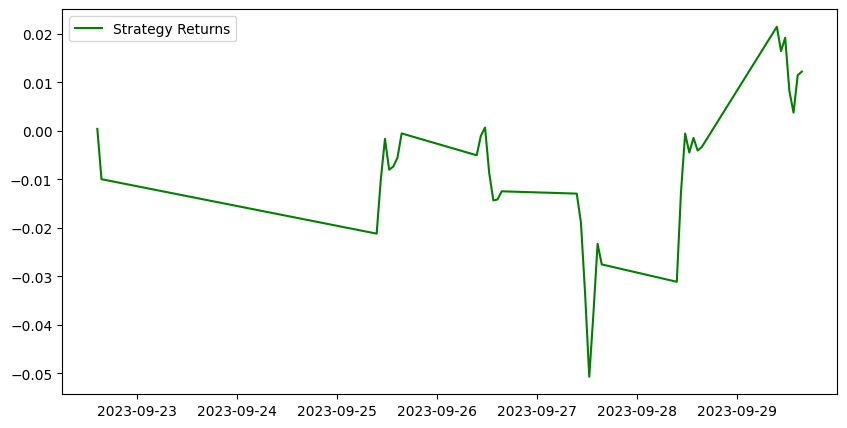

In [ ]:
df['Predicted_Signal'] = model.predict(X)
df['TSLA_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_TSLA_returns = np.cumsum(df[split:]['TSLA_returns'])


df['Strategy_returns'] = df['TSLA_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()